<a href="https://colab.research.google.com/github/chittoorking/Bike-Sharing-Demand-Prediction/blob/main/ADA_project_code_hourly.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mounting to the drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Changing path to the location where the data is present**

In [ ]:
%cd /content/drive/MyDrive/Bike-Sharing-Dataset

/content/drive/MyDrive/Bike-Sharing-Dataset


**we will dig deeper into the data and apply various machine learning regression techniques like Decision Trees, Random Forest and Ada boost regressor. We will find the best hyperparameters by parameter tuning using GridSearchCV for every regressor algorithm.**

**After analysing errors of each model, We will select a model which gives us the least  Mean Squared  Error(MSE) score and best r2_score and build a model using it.**

# **Importing necessary libraries**

In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme()
import pylab
import calendar
%matplotlib inline
import missingno as msno
from datetime import datetime

**Loading the hour wise data set**

In [ ]:
df_hr = pd.read_csv("/content/drive/MyDrive/Bike-Sharing-Dataset/hour.csv")
df_hr.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2011,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,01-01-2011,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,01-01-2011,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,01-01-2011,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,01-01-2011,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [ ]:
df_hr.shape

(17379, 17)

In [ ]:
#Creating a tempDate column
df_hr['tempDate'] = df_hr.dteday.apply(lambda x:x.split())

In [ ]:
#splitting the tempDate column into day 
df_hr['day'] = df_hr.tempDate.apply(lambda x:x[0].split('-')[0])

In [ ]:
df_hr.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,tempDate,day
0,1,01-01-2011,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,[01-01-2011],01
1,2,01-01-2011,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,[01-01-2011],01
2,3,01-01-2011,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32,[01-01-2011],01
3,4,01-01-2011,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13,[01-01-2011],01
4,5,01-01-2011,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1,[01-01-2011],01


In [ ]:
#Removing redundant columns
df_hr = df_hr.drop('tempDate',axis=1) 
df_hr = df_hr.drop('dteday',axis=1)
df_hr = df_hr.drop('instant',axis=1)

In [ ]:
#checking if there are any missing values in any columns
df_hr.isna().sum()

season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
day           0
dtype: int64

In [ ]:
#summary statistics about the dataframe such as the mean, maximum and minimum values. 
#At the top of the table is a row called counts
df_hr.describe()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [ ]:
#we have a more concise summary of the state of the data and the extent of data missingness
df_hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      17379 non-null  int64  
 1   yr          17379 non-null  int64  
 2   mnth        17379 non-null  int64  
 3   hr          17379 non-null  int64  
 4   holiday     17379 non-null  int64  
 5   weekday     17379 non-null  int64  
 6   workingday  17379 non-null  int64  
 7   weathersit  17379 non-null  int64  
 8   temp        17379 non-null  float64
 9   atemp       17379 non-null  float64
 10  hum         17379 non-null  float64
 11  windspeed   17379 non-null  float64
 12  casual      17379 non-null  int64  
 13  registered  17379 non-null  int64  
 14  cnt         17379 non-null  int64  
 15  day         17379 non-null  object 
dtypes: float64(4), int64(11), object(1)
memory usage: 2.1+ MB


In [ ]:
#we have day as the object datatype which needs to be changed to int type
df_hr['day']=df_hr['day'].astype('str').astype(int);

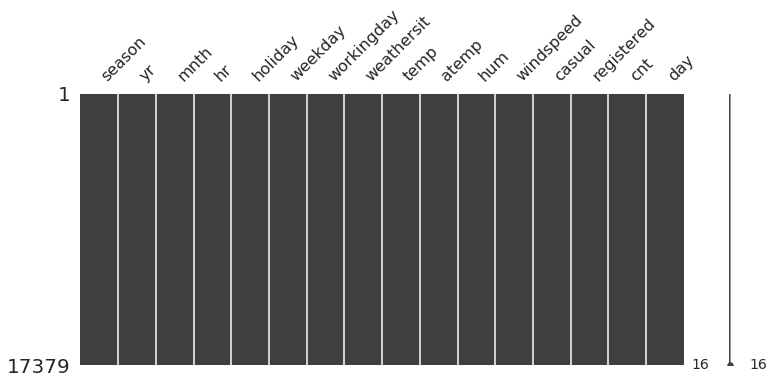

In [ ]:
msno.matrix(df_hr,figsize=(12,5))

**Missingno is an excellent and simple to use Python library that provides a series of visualisations to understand the presence and distribution of missing data within a pandas dataframe**

**The matrix plot is a great tool if you are working with depth-related data or time-series data. It provides a colour fill for each column. When data is present, the plot is shaded in grey (or your colour of choice), and when it is absent the plot is displayed in white.**

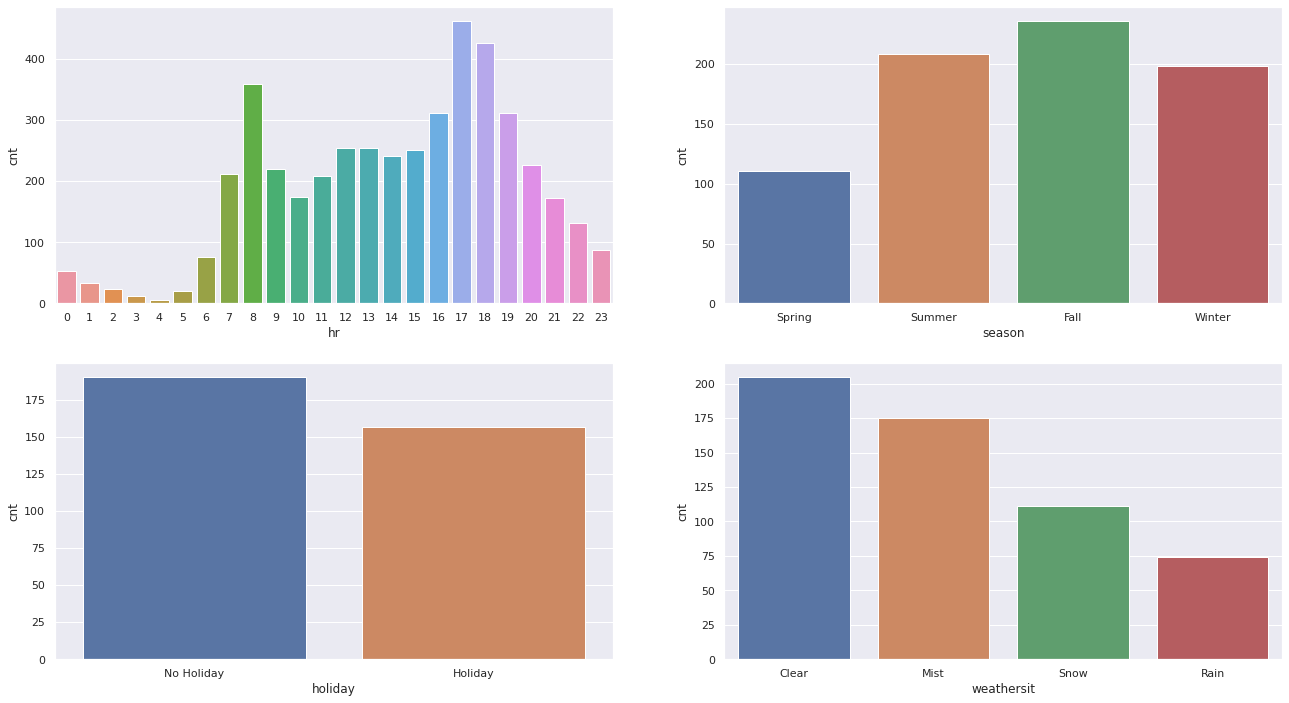

In [ ]:
fig = plt.figure(figsize=[22,12])
ax1 = fig.add_subplot(2,2,1)
ax1 = sns.barplot(x='hr',y='cnt',data=df_hr.groupby('hr')['cnt'].mean().reset_index())


ax3 = fig.add_subplot(2,2,2)
ax3 = sns.barplot(x='season',y='cnt',data=df_hr.groupby('season')['cnt'].mean().reset_index())
ax3.set_xticks([0,1,2,3])
ax3.set_xticklabels(['Spring','Summer','Fall','Winter'])

#holiday based count
ax2 = fig.add_subplot(2,2,3)
ax2 = sns.barplot(x='holiday',y='cnt',data=df_hr.groupby('holiday')['cnt'].mean().reset_index())
ax2.set_xticks([0,1])
ax2.set_xticklabels(['No Holiday','Holiday'])

ax4 = fig.add_subplot(2,2,4)
ax4 = sns.barplot(x='weathersit',y='cnt',data=df_hr.groupby('weathersit')['cnt'].mean().reset_index())
ax4.set_xticks([0,1,2,3])
ax4.set_xticklabels(['Clear','Mist','Snow','Rain'])
plt.show()

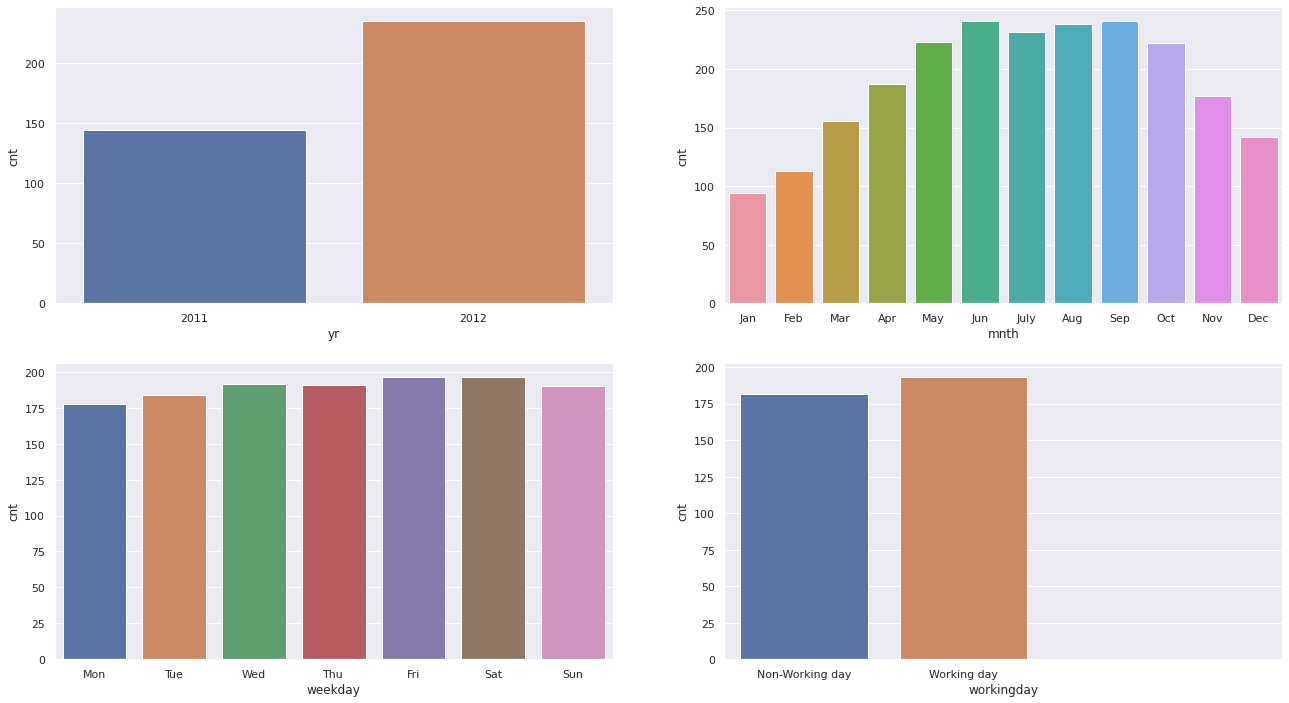

In [ ]:
fig = plt.figure(figsize=[22,12])
ax1 = fig.add_subplot(2,2,1)
ax1 = sns.barplot(x='yr',y='cnt',data=df_hr.groupby('yr')['cnt'].mean().reset_index())
my_labels =['2011','2012']
ax1.set_xticks([0,1])
ax1.set_xticklabels(['2011','2012'])

ax3 = fig.add_subplot(2,2,2)
ax3 = sns.barplot(x='mnth',y='cnt',data=df_hr.groupby('mnth')['cnt'].mean().reset_index())
ax3.set_xticks([0,1,2,3,4,5,6,7,8,9,10,11])
ax3.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','July','Aug','Sep','Oct','Nov','Dec'])

#holiday based count
ax2 = fig.add_subplot(2,2,3)
ax2 = sns.barplot(x='weekday',y='cnt',data=df_hr.groupby('weekday')['cnt'].mean().reset_index())
ax2.set_xticks([0,1,2,3,4,5,6])
ax2.set_xticklabels(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])

ax4 = fig.add_subplot(2,2,4)
ax4 = sns.barplot(x='workingday',y='cnt',data=df_hr.groupby('workingday')['cnt'].mean().reset_index())
ax4.set_xticks([0,1,2,3])
ax4.set_xticklabels(['Non-Working day','Working day'])
plt.show()

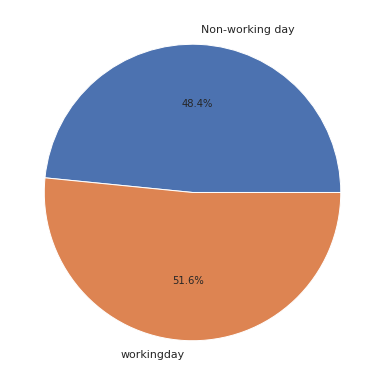

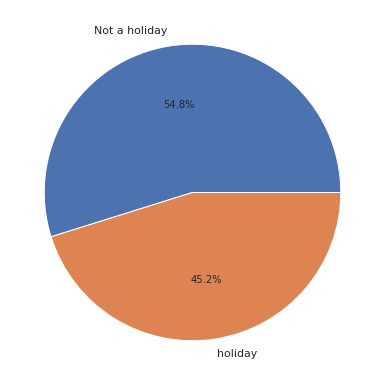

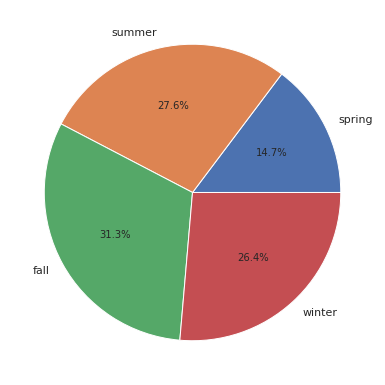

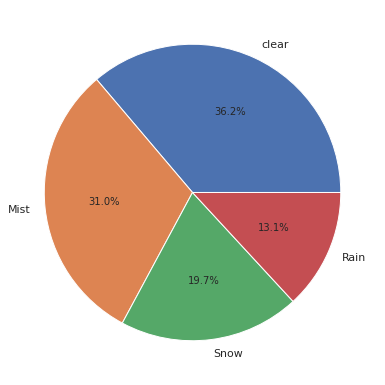

In [ ]:
#workingday based count
data=df_hr.groupby('workingday')['cnt'].mean()
mylabels = ['Non-working day','workingday']
fig = plt.figure(figsize=[25,15])
ax1 = fig.add_subplot(2,2,1)
ax1 = plt.pie(data, labels = mylabels, autopct='%1.1f%%')
plt.show()
#holiday based count
data=df_hr.groupby('holiday')['cnt'].mean()
mylabels = ['Not a holiday','holiday']
fig = plt.figure(figsize=[25,15])
ax2 = fig.add_subplot(2,2,2)
ax2 = plt.pie(data, labels = mylabels, autopct='%1.1f%%')
plt.show()

#season based count
data=df_hr.groupby('season')['cnt'].mean()
mylabels = ['spring','summer','fall','winter']
fig = plt.figure(figsize=[25,15])
ax3 = fig.add_subplot(2,2,3)
ax3 = plt.pie(data, labels = mylabels, autopct='%1.1f%%')
plt.show()

#weatherlist based count
data=df_hr.groupby('weathersit')['cnt'].mean()
mylabels = ['clear','Mist','Snow','Rain']
fig = plt.figure(figsize=[25,15])
ax4 = fig.add_subplot(2,2,4)
ax4 = plt.pie(data, labels = mylabels, autopct='%1.1f%%')

plt.show()

# Outlier Detection

In [ ]:
df_hr.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,1
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,1
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32,1
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13,1
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1,1


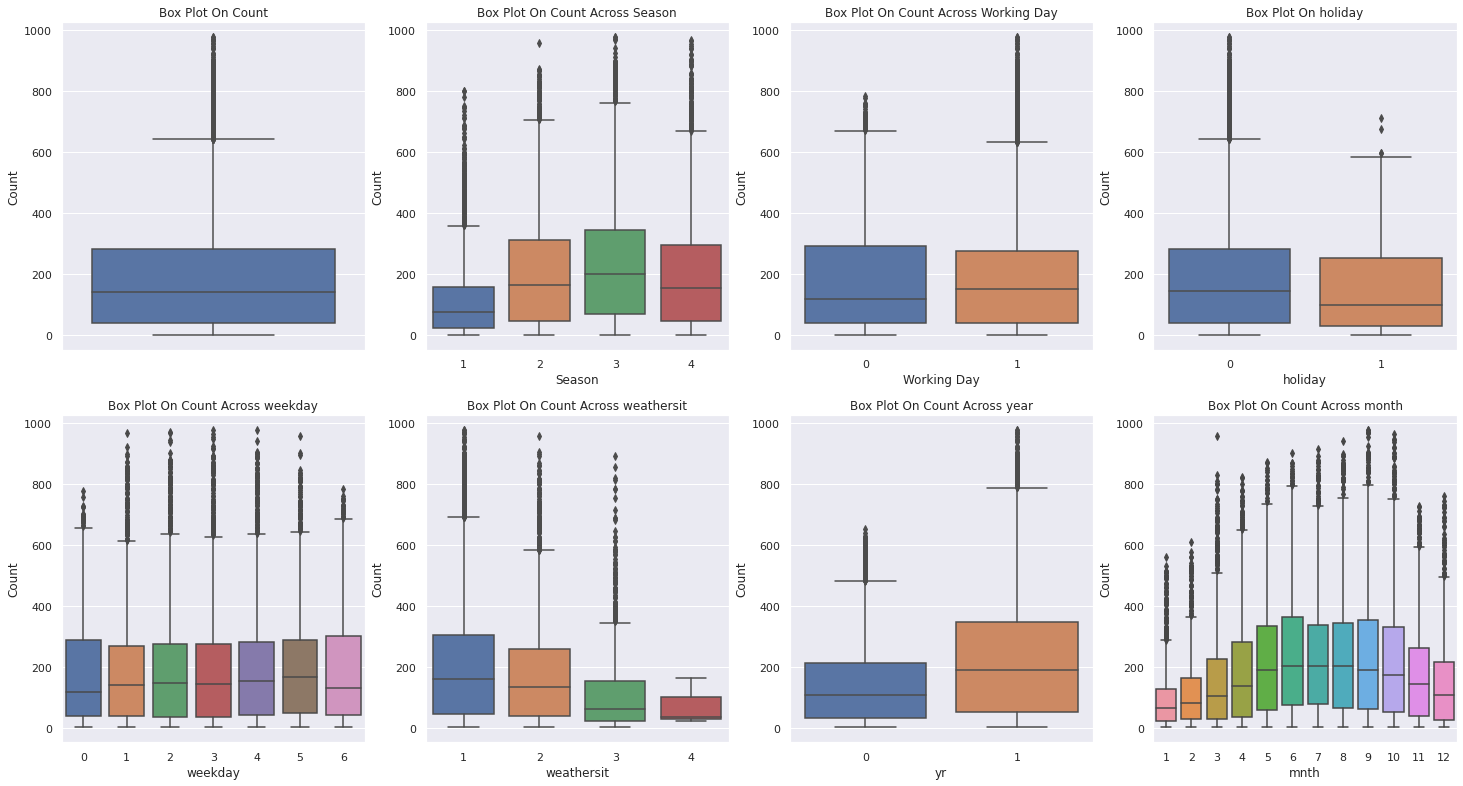

In [ ]:
fig, axes = plt.subplots(nrows=2,ncols=4)
fig.set_size_inches(25, 10)
sns.boxplot(data=df_hr,y="cnt",orient="v",ax=axes[0][0])
sns.boxplot(data=df_hr,y="cnt",x="season",orient="v",ax=axes[0][1])
sns.boxplot(data=df_hr,y="cnt",x="workingday",orient="v",ax=axes[0][2])
sns.boxplot(data=df_hr,y="cnt",x="holiday",orient="v",ax=axes[0][3])
sns.boxplot(data=df_hr,y="cnt",x="weekday",orient="v",ax=axes[1][0])
sns.boxplot(data=df_hr,y="cnt",x="weathersit",orient="v",ax=axes[1][1])
sns.boxplot(data=df_hr,y="cnt",x="yr",orient="v",ax=axes[1][2])
sns.boxplot(data=df_hr,y="cnt",x="mnth",orient="v",ax=axes[1][3])

axes[0][0].set(ylabel='Count',title="Box Plot On Count")
axes[0][1].set(xlabel='Season', ylabel='Count',title="Box Plot On Count Across Season")
axes[0][2].set(xlabel='Working Day', ylabel='Count',title="Box Plot On Count Across Working Day")
axes[0][3].set(xlabel='holiday',ylabel='Count',title="Box Plot On holiday")
axes[1][0].set(xlabel='weekday', ylabel='Count',title="Box Plot On Count Across weekday")
axes[1][1].set(xlabel='weathersit', ylabel='Count',title="Box Plot On Count Across weathersit")
axes[1][2].set(xlabel='yr', ylabel='Count',title="Box Plot On Count Across year")
axes[1][3].set(xlabel='mnth', ylabel='Count',title="Box Plot On Count Across month")

plt.subplots_adjust(bottom=2,top=3)
plt.show()

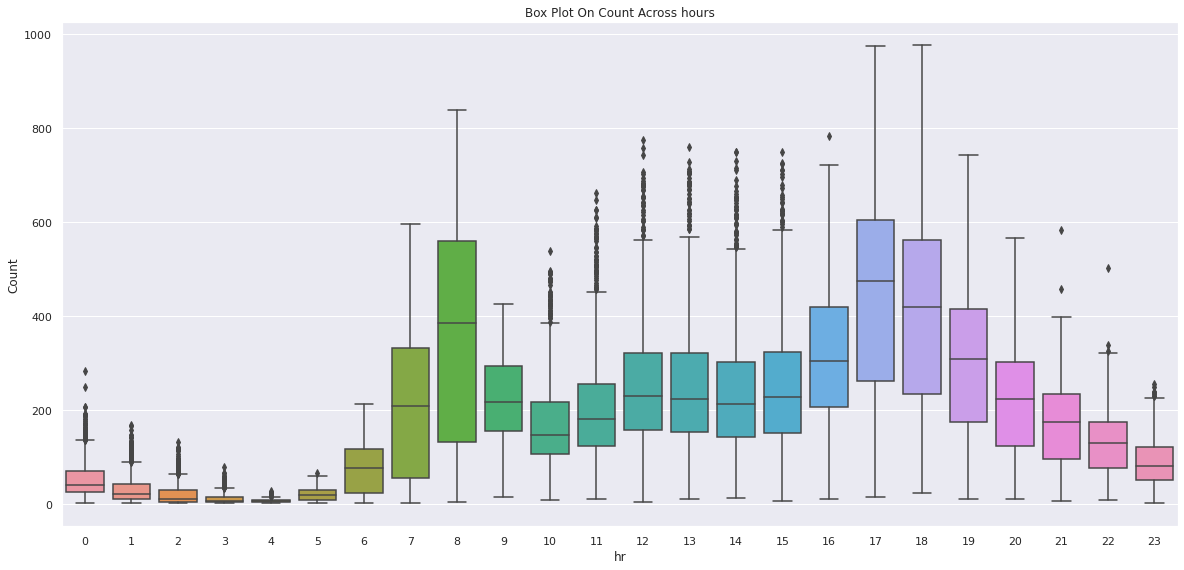

In [ ]:
fig, axes = plt.subplots(nrows=1,ncols=1)
fig.set_size_inches(20, 7)
sns.boxplot(data=df_hr,y="cnt",x="hr",orient="v",ax=axes)
axes.set(xlabel='hr', ylabel='Count',title="Box Plot On Count Across hours")
plt.subplots_adjust(bottom=2,top=3)
plt.show()

In [ ]:
df_hr_o = df_hr[np.abs(df_hr["cnt"]-df_hr["cnt"].mean()) <=(1.5*df_hr["cnt"].std())]
df_hr_o =df_hr_o[np.abs(df_hr["weekday"]-df_hr["weekday"].mean()) <=(1.5*df_hr["weekday"].std())]
df_hr_o =df_hr_o[np.abs(df_hr["weathersit"]-df_hr["weathersit"].mean()) <=(1.5*df_hr["weathersit"].std())]
df_hr_o =df_hr_o[np.abs(df_hr["yr"]-df_hr["yr"].mean()) <=(1.5*df_hr["yr"].std())]
df_hr_o =df_hr_o[np.abs(df_hr["hr"]-df_hr["hr"].mean()) <=(1.5*df_hr["hr"].std())]
df_hr_o =df_hr_o[np.abs(df_hr["workingday"]-df_hr["workingday"].mean()) <=(1.5*df_hr["workingday"].std())]
df_hr_o =df_hr_o[np.abs(df_hr["season"]-df_hr["season"].mean()) <=(1.5*df_hr["season"].std())]
df_hr_o =df_hr_o[np.abs(df_hr["hr"]-df_hr["hr"].mean()) <=(1.5*df_hr["hr"].std())]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/usr/local/li

In [ ]:
print ("Shape Of The Before Ouliers: ",df_hr.shape)
print ("Shape Of The After Ouliers: ",df_hr_o.shape)

Shape Of The Before Ouliers:  (17379, 16)
Shape Of The After Ouliers:  (11693, 16)


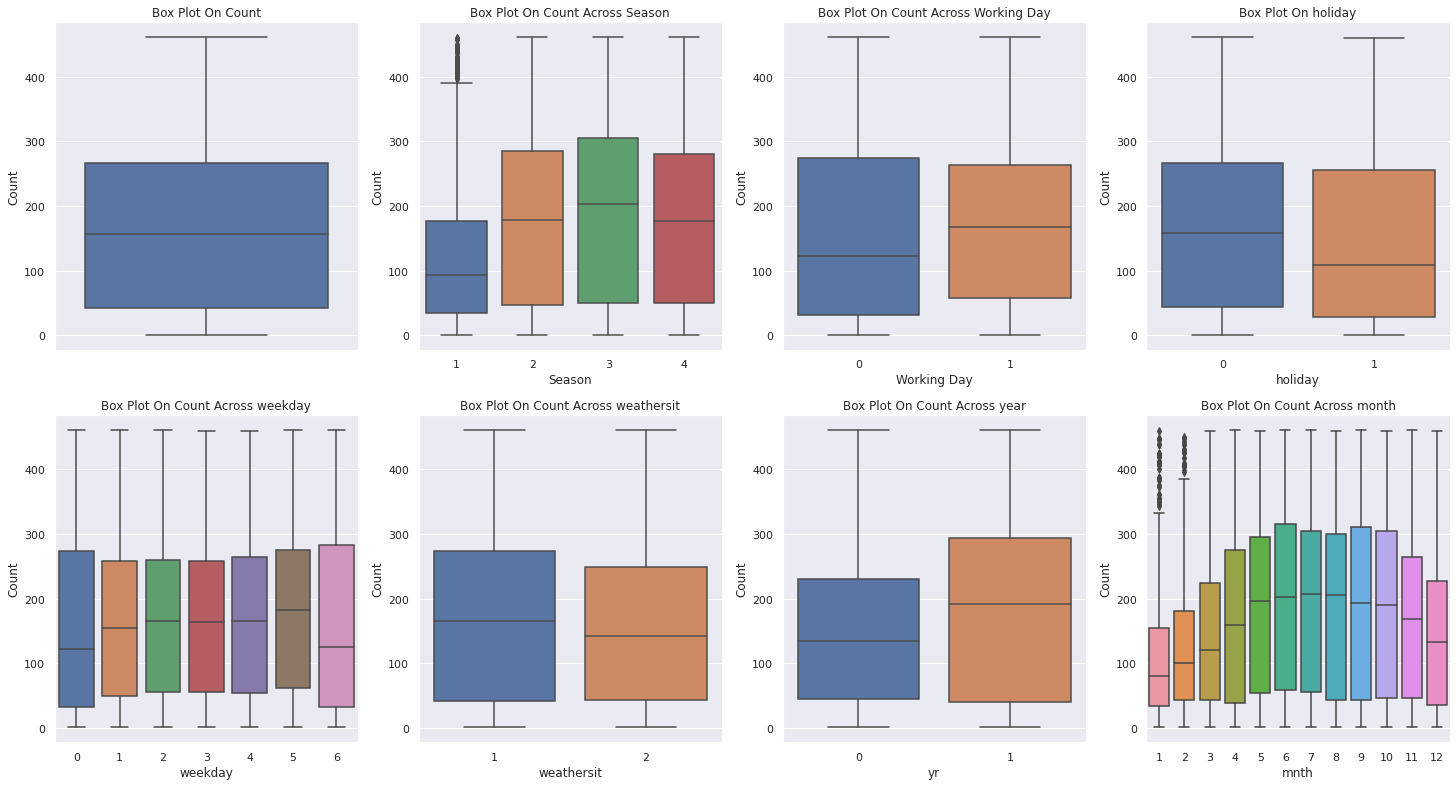

In [ ]:
fig, axes = plt.subplots(nrows=2,ncols=4)
fig.set_size_inches(25, 10)
sns.boxplot(data=df_hr_o,y="cnt",orient="v",ax=axes[0][0])
sns.boxplot(data=df_hr_o,y="cnt",x="season",orient="v",ax=axes[0][1])
sns.boxplot(data=df_hr_o,y="cnt",x="workingday",orient="v",ax=axes[0][2])
sns.boxplot(data=df_hr_o,y="cnt",x="holiday",orient="v",ax=axes[0][3])
sns.boxplot(data=df_hr_o,y="cnt",x="weekday",orient="v",ax=axes[1][0])
sns.boxplot(data=df_hr_o,y="cnt",x="weathersit",orient="v",ax=axes[1][1])
sns.boxplot(data=df_hr_o,y="cnt",x="yr",orient="v",ax=axes[1][2])
sns.boxplot(data=df_hr_o,y="cnt",x="mnth",orient="v",ax=axes[1][3])

axes[0][0].set(ylabel='Count',title="Box Plot On Count")
axes[0][1].set(xlabel='Season', ylabel='Count',title="Box Plot On Count Across Season")
axes[0][2].set(xlabel='Working Day', ylabel='Count',title="Box Plot On Count Across Working Day")
axes[0][3].set(xlabel='holiday',ylabel='Count',title="Box Plot On holiday")
axes[1][0].set(xlabel='weekday', ylabel='Count',title="Box Plot On Count Across weekday")
axes[1][1].set(xlabel='weathersit', ylabel='Count',title="Box Plot On Count Across weathersit")
axes[1][2].set(xlabel='yr', ylabel='Count',title="Box Plot On Count Across year")
axes[1][3].set(xlabel='mnth', ylabel='Count',title="Box Plot On Count Across month")

plt.subplots_adjust(bottom=2,top=3)
plt.show()

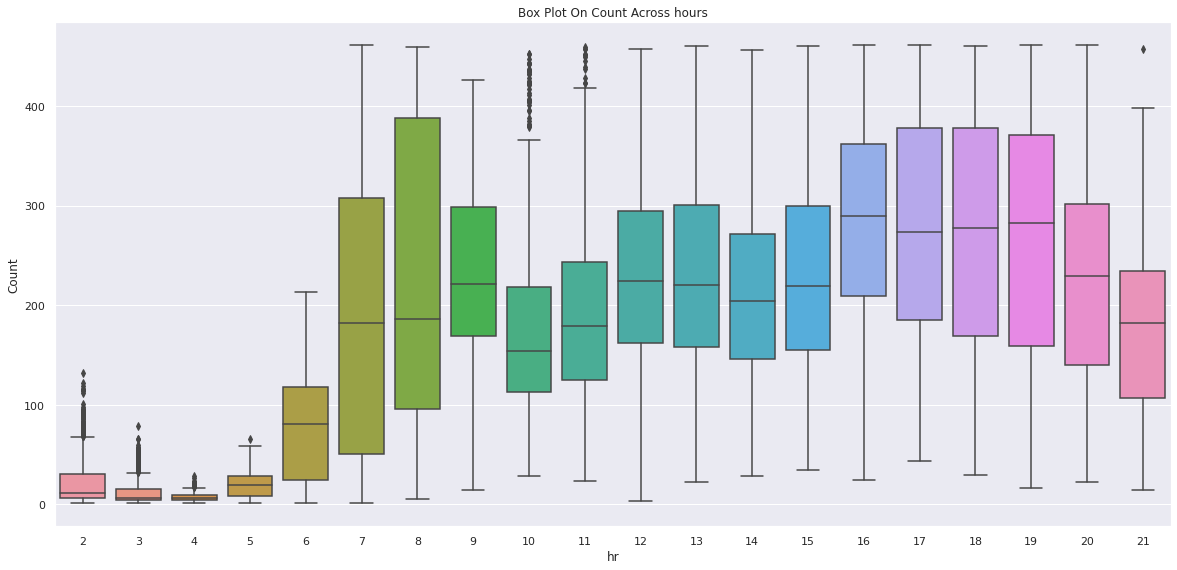

In [ ]:
fig, axes = plt.subplots(nrows=1,ncols=1)
fig.set_size_inches(20, 7)
sns.boxplot(data=df_hr_o,y="cnt",x="hr",orient="v",ax=axes)
axes.set(xlabel='hr', ylabel='Count',title="Box Plot On Count Across hours")
plt.subplots_adjust(bottom=2,top=3)
plt.show()

In [ ]:
df_hr_o.corr()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day
season,1.000000,-0.019953,0.824975,-0.035685,-0.007487,0.005286,0.010787,0.003481,0.321950,0.331320,0.173502,-0.171743,0.137555,0.177126,0.185314,-0.005674
yr,-0.019953,1.000000,-0.015167,-0.056766,0.013395,-0.003657,0.022333,0.020754,-0.013187,-0.015346,-0.037004,-0.015417,0.022554,0.153447,0.131144,0.003613
mnth,0.824975,-0.015167,1.000000,-0.028515,0.023775,0.022637,-0.015504,0.023085,0.204715,0.212655,0.178673,-0.148260,0.082349,0.128628,0.129237,0.020666
hr,-0.035685,-0.056766,-0.028515,1.000000,0.000728,-0.002893,0.002292,-0.041659,0.136669,0.131775,-0.383440,0.179846,0.407492,0.546476,0.566598,-0.000016
holiday,-0.007487,0.013395,0.023775,0.000728,1.000000,-0.100729,-0.263006,-0.009186,-0.029783,-0.033943,-0.011469,-0.000988,0.053222,-0.048053,-0.022726,-0.003801
weekday,0.005286,-0.003657,0.022637,-0.002893,-0.100729,1.000000,0.052347,0.000025,-0.000932,-0.007997,-0.035562,0.021084,0.000874,0.026619,0.021826,0.002906
workingday,0.010787,0.022333,-0.015504,0.002292,-0.263006,0.052347,1.000000,0.043079,0.072582,0.072308,-0.016755,0.002811,-0.269182,0.153943,0.042779,0.001779
weathersit,0.003481,0.020754,0.023085,-0.041659,-0.009186,0.000025,0.043079,1.000000,-0.072076,-0.068170,0.308556,-0.045027,-0.080434,-0.025890,-0.045443,0.004735
temp,0.321950,-0.013187,0.204715,0.136669,-0.029783,-0.000932,0.072582,-0.072076,1.000000,0.988382,-0.022946,-0.035396,0.484589,0.298642,0.389328,0.037453
atemp,0.331320,-0.015346,0.212655,0.131775,-0.033943,-0.007997,0.072308,-0.068170,0.988382,1.000000,0.000255,-0.076143,0.477499,0.297604,0.386330,0.032951


In [ ]:
# Dropping season column as it is highly correlated to‘mnth’ column
df_hr_o.drop('season',axis=1,inplace=True) 
# Dropping atemp column as it is highly correlated to ‘temp’ column
df_hr_o = df_hr_o.drop('atemp',axis=1) 

In [ ]:
df_hr2=df_hr_o.set_index('hr')

In [ ]:
df_hr2.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt,day
hr,,,,,,,,,,,,,
2,0,1,0,6,0,1,0.22,0.80,0.0000,5,27,32,1
3,0,1,0,6,0,1,0.24,0.75,0.0000,3,10,13,1
4,0,1,0,6,0,1,0.24,0.75,0.0000,0,1,1,1
5,0,1,0,6,0,2,0.24,0.75,0.0896,0,1,1,1
6,0,1,0,6,0,1,0.22,0.80,0.0000,2,0,2,1


In [ ]:
hr_data = df_hr2[['cnt','registered','casual']]

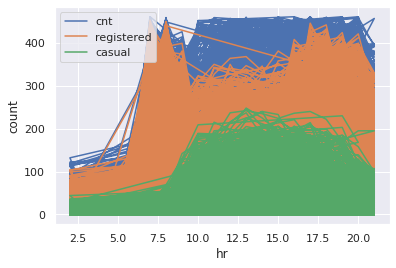

In [ ]:
hr_data.plot()
plt.ylabel('count');

In [ ]:
df_hr_o.head()

,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt,day
2,0,1,2,0,6,0,1,0.22,0.80,0.0000,5,27,32,1
3,0,1,3,0,6,0,1,0.24,0.75,0.0000,3,10,13,1
4,0,1,4,0,6,0,1,0.24,0.75,0.0000,0,1,1,1
5,0,1,5,0,6,0,2,0.24,0.75,0.0896,0,1,1,1
6,0,1,6,0,6,0,1,0.22,0.80,0.0000,2,0,2,1


In [ ]:
#Replacing categorical variables with actual values in weathersit
df_hr_o['weathersit'] = df_hr_o['weathersit'].replace({1:'springer',2:'summer',3:'fall',4:'winter'})
df_hr_o['weekday'] = df_hr_o['weekday'].replace({0:'sunday',1:'monday',2:'tuesday',3:'wednesday',4:'thursday',5:'friday',6:'saturday'})
# One hot encoding on categorical columns.
df_hr_o=pd.get_dummies(df_hr_o,columns=['weathersit','weekday'],drop_first=True)

In [ ]:
df_hr_o.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11693 entries, 2 to 17376
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   yr                 11693 non-null  int64  
 1   mnth               11693 non-null  int64  
 2   hr                 11693 non-null  int64  
 3   holiday            11693 non-null  int64  
 4   workingday         11693 non-null  int64  
 5   temp               11693 non-null  float64
 6   hum                11693 non-null  float64
 7   windspeed          11693 non-null  float64
 8   casual             11693 non-null  int64  
 9   registered         11693 non-null  int64  
 10  cnt                11693 non-null  int64  
 11  day                11693 non-null  int64  
 12  weathersit_summer  11693 non-null  uint8  
 13  weekday_monday     11693 non-null  uint8  
 14  weekday_saturday   11693 non-null  uint8  
 15  weekday_sunday     11693 non-null  uint8  
 16  weekday_thursday   116

In [ ]:
df_hr_o.corr()

,yr,mnth,hr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt,day,weathersit_summer,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday
yr,1.000000,-0.015167,-0.056766,0.013395,0.022333,-0.013187,-0.037004,-0.015417,0.022554,0.153447,0.131144,0.003613,0.020754,0.000121,-0.025025,-0.011377,0.009379,0.001510,0.020364
mnth,-0.015167,1.000000,-0.028515,0.023775,-0.015504,0.204715,0.178673,-0.148260,0.082349,0.128628,0.129237,0.020666,0.023085,-0.009117,0.011100,-0.002314,0.011417,-0.021018,-0.010506
hr,-0.056766,-0.028515,1.000000,0.000728,0.002292,0.136669,-0.383440,0.179846,0.407492,0.546476,0.566598,-0.000016,-0.041659,-0.001946,-0.004037,0.000598,0.000905,0.008960,-0.005012
holiday,0.013395,0.023775,0.000728,1.000000,-0.263006,-0.029783,-0.011469,-0.000988,0.053222,-0.048053,-0.022726,-0.003801,-0.009186,0.283582,-0.074532,-0.076290,-0.018903,-0.045673,-0.051813
workingday,0.022333,-0.015504,0.002292,-0.263006,1.000000,0.072582,-0.016755,0.002811,-0.269182,0.153943,0.042779,0.001779,0.043079,0.152964,-0.590003,-0.603913,0.261802,0.265532,0.265228
temp,-0.013187,0.204715,0.136669,-0.029783,0.072582,1.000000,-0.022946,-0.035396,0.484589,0.298642,0.389328,0.037453,-0.072076,-0.000076,-0.041253,-0.040081,0.024616,0.027574,0.032134
hum,-0.037004,0.178673,-0.383440,-0.011469,-0.016755,-0.022946,1.000000,-0.340159,-0.311593,-0.259411,-0.304915,0.023104,0.308556,0.015505,0.000247,0.027464,-0.026226,0.004497,0.008241
windspeed,-0.015417,-0.148260,0.179846,-0.000988,0.002811,-0.035396,-0.340159,1.000000,0.082333,0.099764,0.105854,-0.000484,-0.045027,-0.008436,0.017673,-0.020590,0.020261,0.008790,-0.005781
casual,0.022554,0.082349,0.407492,0.053222,-0.269182,0.484589,-0.311593,0.082333,1.000000,0.510112,0.717430,-0.004389,-0.080434,-0.035656,0.162426,0.167720,-0.089218,-0.092755,-0.097114
registered,0.153447,0.128628,0.546476,-0.048053,0.153943,0.298642,-0.259411,0.099764,0.510112,1.000000,0.965147,-0.012014,-0.025890,0.009171,-0.082440,-0.097471,0.040309,0.038539,0.035309


In [ ]:
df_hr_o.reset_index()

,index,yr,mnth,hr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt,day,weathersit_summer,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday
0,2,0,1,2,0,0,0.22,0.80,0.0000,5,27,32,1,0,0,1,0,0,0,0
1,3,0,1,3,0,0,0.24,0.75,0.0000,3,10,13,1,0,0,1,0,0,0,0
2,4,0,1,4,0,0,0.24,0.75,0.0000,0,1,1,1,0,0,1,0,0,0,0
3,5,0,1,5,0,0,0.24,0.75,0.0896,0,1,1,1,1,0,1,0,0,0,0
4,6,0,1,6,0,0,0.22,0.80,0.0000,2,0,2,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11688,17372,1,12,17,0,1,0.26,0.48,0.0896,14,150,164,31,1,1,0,0,0,0,0
11689,17373,1,12,18,0,1,0.26,0.48,0.1343,10,112,122,31,1,1,0,0,0,0,0
11690,17374,1,12,19,0,1,0.26,0.60,0.1642,11,108,119,31,1,1,0,0,0,0,0
11691,17375,1,12,20,0,1,0.26,0.60,0.1642,8,81,89,31,1,1,0,0,0,0,0


# Building model for registered bike rentals 

In [ ]:
# Segregating data based on ‘workingday’ column 
work_day = df_hr_o[df_hr_o['workingday']==1] 
non_work_day = df_hr_o[df_hr_o['workingday']==0] 

**Model for working days**



In [ ]:
# Model for registered
#yr	mnth	hr	holiday	weekday	workingday	weathersit	temp	hum	windspeed	casual	registered	cnt	year	month	day
x = work_day.drop(['casual','registered','cnt','workingday'],axis = 1)
y = work_day.registered
# Dividing the data into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.30 ,random_state = 2)

In [ ]:
# Finding best parameters for decision tree
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state=0)
dt_params = {'max_depth':np.arange(1,50,1),'min_samples_leaf':np.arange(2,15)}
from sklearn.model_selection import GridSearchCV
gs_dt = GridSearchCV(dt,dt_params,cv=10)
gs_dt.fit(x_train,y_train)
a = gs_dt.best_params_

In [ ]:
# Training with best parameters
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor(max_depth=a['max_depth'],min_samples_leaf= a['min_samples_leaf'])
model = dtr.fit(x_train,y_train)
y_pred = model.predict(x_test)
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_pred,y_test)
print('MSE for the data:',mse)
from sklearn.metrics import r2_score
r2 = r2_score(y_pred,y_test)
print(r2)

MSE for the data: 1194.2214827563914
0.8901380510218632


In [ ]:
# Finding best parameters for RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=0)
rf_params = {'n_estimators':np.arange(25,150,25),'max_depth':np.arange(1,11,2),'min_samples_leaf':np.arange(2,15,3)}

from sklearn.model_selection import GridSearchCV
gs_rf = GridSearchCV(rf,rf_params,cv=10)
gs_rf.fit(x_train,y_train)
b = gs_rf.best_params_

In [ ]:
# Fitting the model with best params
RF = RandomForestRegressor(n_estimators=b['n_estimators'],max_depth=b['max_depth'],min_samples_leaf=b['min_samples_leaf'],random_state=0)
model = RF.fit(x_train,y_train)
y_pred = model.predict(x_test)
mse=mean_squared_error(y_pred,y_test)
print('MSE for the data:',mse)
r2 = r2_score(y_pred,y_test)
print('r2_score for the data',r2)

MSE for the data: 975.2334462516674
r2_score for the data 0.906314828991459


In [ ]:
# Finding best parameters for AdaBoostRegressor
from sklearn.ensemble import AdaBoostRegressor
ar = AdaBoostRegressor(base_estimator=RF,random_state=0)
ar_params = {'n_estimators':np.arange(25,100,25)}
from sklearn.model_selection import GridSearchCV
gs_ar = GridSearchCV(ar,ar_params,cv=5)
gs_ar.fit(x_train,y_train)
c = gs_ar.best_params_

In [ ]:
# Fitting the model with best params
ab_rf = AdaBoostRegressor(base_estimator=RF,n_estimators=c['n_estimators'],random_state=0)
model = ab_rf.fit(x_train,y_train)
y_pred = model.predict(x_test)
mse=mean_squared_error(y_pred,y_test)
print('MSE for the data:',mse)
r2 = r2_score(y_pred,y_test)
print('r2_score for the data',r2)

MSE for the data: 788.4156222355674
r2_score for the data 0.9225317899549949


**Model for Non-working days**

In [ ]:
# Model for registered
#yr	mnth	hr	holiday	weekday	workingday	weathersit	temp	hum	windspeed	casual	registered	cnt	year	month	day
x = non_work_day.drop(['casual','registered','cnt','workingday'],axis = 1)
y = non_work_day.registered
# Dividing the data into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.30 ,random_state = 2)

In [ ]:
# Finding best parameters for decision tree
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state=0)
dt_params = {'max_depth':np.arange(1,50,1),'min_samples_leaf':np.arange(2,15)}
from sklearn.model_selection import GridSearchCV
gs_dt = GridSearchCV(dt,dt_params,cv=10)
gs_dt.fit(x_train,y_train)
a = gs_dt.best_params_

In [ ]:
# Training with best parameters
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor(max_depth=a['max_depth'],min_samples_leaf= a['min_samples_leaf'])
model = dtr.fit(x_train,y_train)
y_pred = model.predict(x_test)
mse=mean_squared_error(y_pred,y_test)
print('MSE for the data:',mse)
r2 = r2_score(y_pred,y_test)
print(r2)

MSE for the data: 1181.8076493883377
0.8453814318008556


In [ ]:
# Finding best parameters for RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=0)
rf_params = {'n_estimators':np.arange(25,150,25),'max_depth':np.arange(1,11,2),'min_samples_leaf':np.arange(2,15,3)}

from sklearn.model_selection import GridSearchCV
gs_rf = GridSearchCV(rf,rf_params,cv=10)
gs_rf.fit(x_train,y_train)
b = gs_rf.best_params_

In [ ]:
# Fitting the model with best params
RF = RandomForestRegressor(n_estimators=b['n_estimators'],max_depth=b['max_depth'],min_samples_leaf=b['min_samples_leaf'],random_state=0)
model = RF.fit(x_train,y_train)
y_pred = model.predict(x_test)
mse=mean_squared_error(y_pred,y_test)
print('MSE for the data:',mse)
r2 = r2_score(y_pred,y_test)
print('r2_score for the data',r2)

MSE for the data: 876.532385627407
r2_score for the data 0.8765904308255217


In [ ]:
# Finding best parameters for AdaBoostRegressor
from sklearn.ensemble import AdaBoostRegressor
ar = AdaBoostRegressor(base_estimator=RF,random_state=0)
ar_params = {'n_estimators':np.arange(25,100,25)}
from sklearn.model_selection import GridSearchCV
gs_ar = GridSearchCV(ar,ar_params,cv=5)
gs_ar.fit(x_train,y_train)
c = gs_ar.best_params_

In [ ]:
# Fitting the model with best params
ab_rf = AdaBoostRegressor(base_estimator=RF,n_estimators=c['n_estimators'],random_state=0)
model = ab_rf.fit(x_train,y_train)
y_pred = model.predict(x_test)
mse=mean_squared_error(y_pred,y_test)
print('MSE for the data:',mse)
r2 = r2_score(y_pred,y_test)
print('r2_score for the data',r2)

MSE for the data: 709.9459906809523
r2_score for the data 0.8945840065748162


# Building model for casual bike rentals 

**Model for working days**

In [ ]:
x = work_day.drop(['casual','registered','cnt','workingday'],axis = 1)
y = work_day.casual
# Dividing the data into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.30 ,random_state = 2)

In [ ]:
# Finding best parameters for decision tree
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state=0)
dt_params = {'max_depth':np.arange(1,50,1),'min_samples_leaf':np.arange(2,15)}
from sklearn.model_selection import GridSearchCV
gs_dt = GridSearchCV(dt,dt_params,cv=10)
gs_dt.fit(x_train,y_train)
a = gs_dt.best_params_

In [ ]:
# Training with best parameters
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor(max_depth=a['max_depth'],min_samples_leaf= a['min_samples_leaf'])
model = dtr.fit(x_train,y_train)
y_pred = model.predict(x_test)
mse=mean_squared_error(y_pred,y_test)
print('MSE for the data:',mse)
r2 = r2_score(y_pred,y_test)
print(r2)

MSE for the data: 173.25309804848297
RMLSE for the data: 0.5114963628560475
0.720179171084158


In [ ]:
# Finding best parameters for RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=0)
rf_params = {'n_estimators':np.arange(25,150,25),'max_depth':np.arange(1,11,2),'min_samples_leaf':np.arange(2,15,3)}

from sklearn.model_selection import GridSearchCV
gs_rf = GridSearchCV(rf,rf_params,cv=10)
gs_rf.fit(x_train,y_train)
b = gs_rf.best_params_

In [ ]:
# Fitting the model with best params
RF = RandomForestRegressor(n_estimators=b['n_estimators'],max_depth=b['max_depth'],min_samples_leaf=b['min_samples_leaf'],random_state=0)
model = RF.fit(x_train,y_train)
y_pred = model.predict(x_test)
mse=mean_squared_error(y_pred,y_test)
print('MSE for the data:',mse)
r2 = r2_score(y_pred,y_test)
print(r2)

MSE for the data: 164.2645480195017
RMLSE for the data: 0.4804343357353078
0.7027711748205366


In [ ]:
# Finding best parameters for AdaBoostRegressor
from sklearn.ensemble import AdaBoostRegressor
ar = AdaBoostRegressor(base_estimator=RF,random_state=0)
ar_params = {'n_estimators':np.arange(25,100,25)}
from sklearn.model_selection import GridSearchCV
gs_ar = GridSearchCV(ar,ar_params,cv=10)
gs_ar.fit(x_train,y_train)
c = gs_ar.best_params_

In [ ]:
# Fitting the model with best params
ab_rf = AdaBoostRegressor(base_estimator=RF,n_estimators=c['n_estimators'],random_state=0)
model = ab_rf.fit(x_train,y_train)
y_pred = model.predict(x_test)
mse=mean_squared_error(y_pred,y_test)
print('MSE for the data:',mse)
r2 = r2_score(y_pred,y_test)
print(r2)

MSE for the data: 133.7554396642034
0.7764826321584307


**Model for Non-working days**

In [ ]:
x = non_work_day.drop(['casual','registered','cnt','workingday'],axis = 1)
y = non_work_day.casual
# Dividing the data into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.30 ,random_state = 2)

In [ ]:
# Finding best parameters for decision tree
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state=0)
dt_params = {'max_depth':np.arange(1,50,1),'min_samples_leaf':np.arange(2,15)}
from sklearn.model_selection import GridSearchCV
gs_dt = GridSearchCV(dt,dt_params,cv=10)
gs_dt.fit(x_train,y_train)
a = gs_dt.best_params_

In [ ]:
# Training with best parameters
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor(max_depth=a['max_depth'],min_samples_leaf= a['min_samples_leaf'])
model = dtr.fit(x_train,y_train)
y_pred = model.predict(x_test)
mse=mean_squared_error(y_pred,y_test)
print('MSE for the data:',mse)
r2 = r2_score(y_pred,y_test)
print(r2)

MSE for the data: 469.5691557373242
0.8170644311320279


In [ ]:
# Finding best parameters for RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=0)
rf_params = {'n_estimators':np.arange(25,150,25),'max_depth':np.arange(1,11,2),'min_samples_leaf':np.arange(2,15,3)}

from sklearn.model_selection import GridSearchCV
gs_rf = GridSearchCV(rf,rf_params,cv=10)
gs_rf.fit(x_train,y_train)
b = gs_rf.best_params_

In [ ]:
# Fitting the model with best params
RF = RandomForestRegressor(n_estimators=b['n_estimators'],max_depth=b['max_depth'],min_samples_leaf=b['min_samples_leaf'],random_state=0)
model = RF.fit(x_train,y_train)
y_pred = model.predict(x_test)
mse=mean_squared_error(y_pred,y_test)
print('MSE for the data:',mse)
r2 = r2_score(y_pred,y_test)
print(r2)

MSE for the data: 378.4419075512794
0.8409912990338057


In [ ]:
# Finding best parameters for AdaBoostRegressor
from sklearn.ensemble import AdaBoostRegressor
ar = AdaBoostRegressor(base_estimator=RF,random_state=0)
ar_params = {'n_estimators':np.arange(25,100,25)}
from sklearn.model_selection import GridSearchCV
gs_ar = GridSearchCV(ar,ar_params,cv=10)
gs_ar.fit(x_train,y_train)
c = gs_ar.best_params_

In [ ]:
# Fitting the model with best params
ab_rf = AdaBoostRegressor(base_estimator=RF,n_estimators=c['n_estimators'],random_state=0)
model = ab_rf.fit(x_train,y_train)
y_pred = model.predict(x_test)
mse=mean_squared_error(y_pred,y_test)
print('MSE for the data:',mse)
r2 = r2_score(y_pred,y_test)
print(r2)

MSE for the data: 311.34926821836183
0.8653122415936776


# Generalized Model for overall count 

In [ ]:
x = df_hr_o.drop(['casual','registered','cnt'],axis = 1)
y = df_hr_o.cnt
# Dividing the data into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.30 ,random_state = 2)

In [ ]:
x.head()

,yr,mnth,hr,holiday,workingday,temp,hum,windspeed,day,weathersit_summer,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday
2,0,1,2,0,0,0.22,0.80,0.0000,1,0,0,1,0,0,0,0
3,0,1,3,0,0,0.24,0.75,0.0000,1,0,0,1,0,0,0,0
4,0,1,4,0,0,0.24,0.75,0.0000,1,0,0,1,0,0,0,0
5,0,1,5,0,0,0.24,0.75,0.0896,1,1,0,1,0,0,0,0
6,0,1,6,0,0,0.22,0.80,0.0000,1,0,0,1,0,0,0,0


In [ ]:
# Finding best parameters for decision tree
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state=0)
dt_params = {'max_depth':np.arange(1,50,1),'min_samples_leaf':np.arange(2,15)}
from sklearn.model_selection import GridSearchCV
gs_dt = GridSearchCV(dt,dt_params,cv=10)
gs_dt.fit(x_train,y_train)
a = gs_dt.best_params_

In [ ]:
# Training with best parameters
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor(max_depth=a['max_depth'],min_samples_leaf= a['min_samples_leaf'])
model = dtr.fit(x_train,y_train)
y_pred = model.predict(x_test)
mse=mean_squared_error(y_pred,y_test)
print('MSE for the data:',mse)
r2 = r2_score(y_pred,y_test)
print(r2)

MSE for the data: 1931.0749590598139
0.8773054178787941


In [ ]:
# Finding best parameters for RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=0)
rf_params = {'n_estimators':np.arange(25,150,25),'max_depth':np.arange(1,11,2),'min_samples_leaf':np.arange(2,15,3)}

from sklearn.model_selection import GridSearchCV
gs_rf = GridSearchCV(rf,rf_params,cv=10)
gs_rf.fit(x_train,y_train)
b = gs_rf.best_params_

In [ ]:
# Fitting the model with best params
RF = RandomForestRegressor(n_estimators=b['n_estimators'],max_depth=b['max_depth'],min_samples_leaf=b['min_samples_leaf'],random_state=0)
model_hour_chosen = RF.fit(x_train,y_train)
y_pred = model_hour_chosen.predict(x_test)
mse=mean_squared_error(y_pred,y_test)
print('MSE for the data:',mse)
r2 = r2_score(y_pred,y_test)
print(r2)

MSE for the data: 1749.0787279978333
0.8778275195853532


In [ ]:
# Finding best parameters for AdaBoostRegressor
from sklearn.ensemble import AdaBoostRegressor
ar = AdaBoostRegressor(base_estimator=RF,random_state=0)
ar_params = {'n_estimators':np.arange(25,100,25)}
from sklearn.model_selection import GridSearchCV
gs_ar = GridSearchCV(ar,ar_params,cv=10)
gs_ar.fit(x_train,y_train)
c = gs_ar.best_params_

In [ ]:
# Fitting the model with best params
ab_rf = AdaBoostRegressor(base_estimator=RF,n_estimators=c['n_estimators'],random_state=0)
model = ab_rf.fit(x_train,y_train)
y_pred = model.predict(x_test)
mse=mean_squared_error(y_pred,y_test)
print('MSE for the data:',mse)
r2 = r2_score(y_pred,y_test)
print(r2)

MSE for the data: 1589.0667073941697
0.8812372001789832


Below is the code used for generating code model pickle file

In [ ]:
import pickle 
pickle_out = open("hour_model_deployed", mode = "wb") 
pickle.dump(model_hour_chosen, pickle_out) 
pickle_out.close()

In [ ]:
#--------------------------------------------------------------------End of notebook -------------------------------------------------------------------#